#Load Pre-Trained Model - ResNet50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Data/6/images'

/content/drive/MyDrive/Data/6/images


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

resnet_model = ResNet50(weights='imagenet')

In [ ]:
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/Data/6/images/imagenet_images/dog.jpg' 

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = resnet_model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02106662', 'German_shepherd', 0.99842924), ('n02105412', 'kelpie', 0.00070397585), ('n02105162', 'malinois', 0.0005039554)]


## Let's try it on a few images and display the results over the image

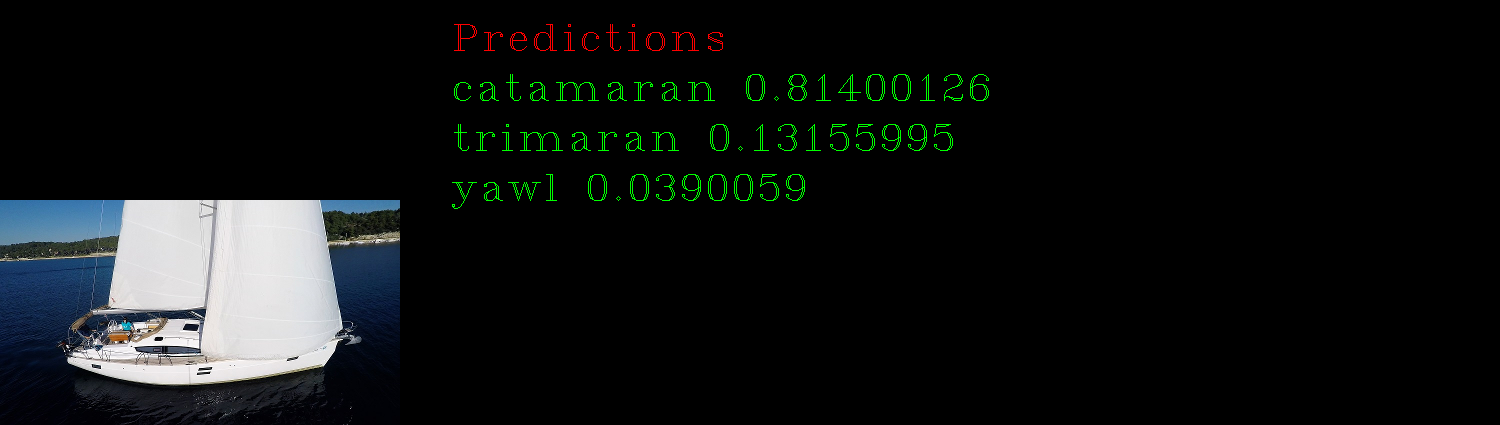

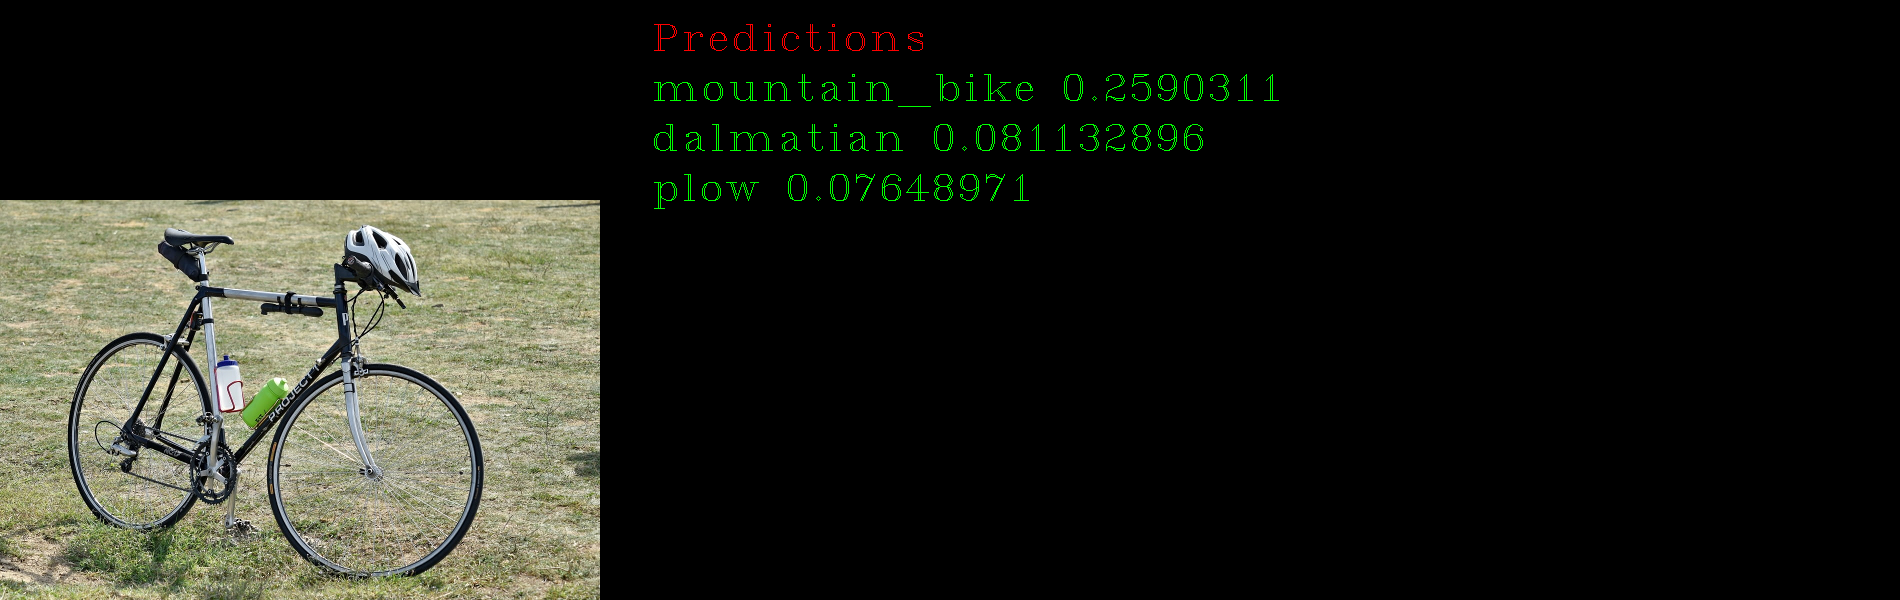

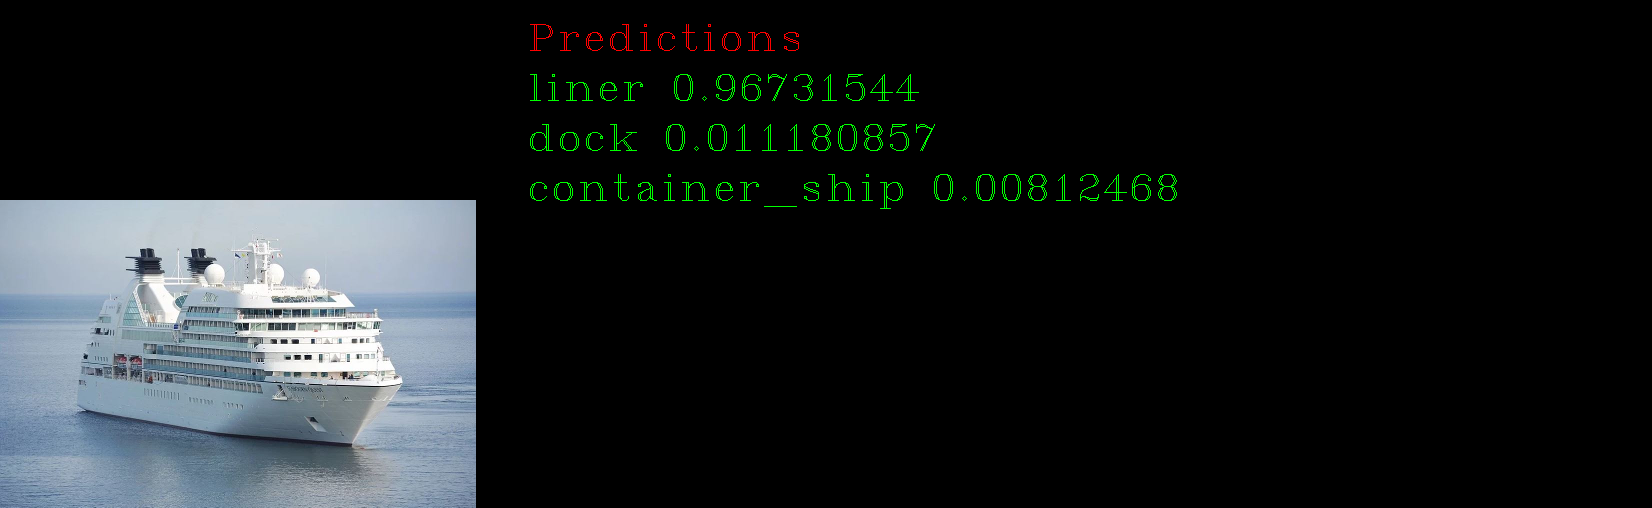

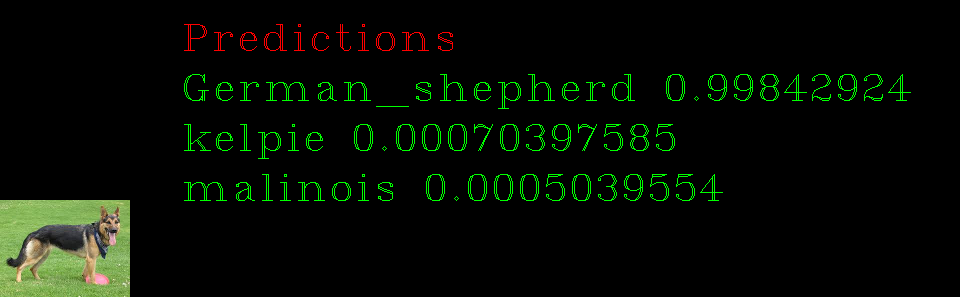

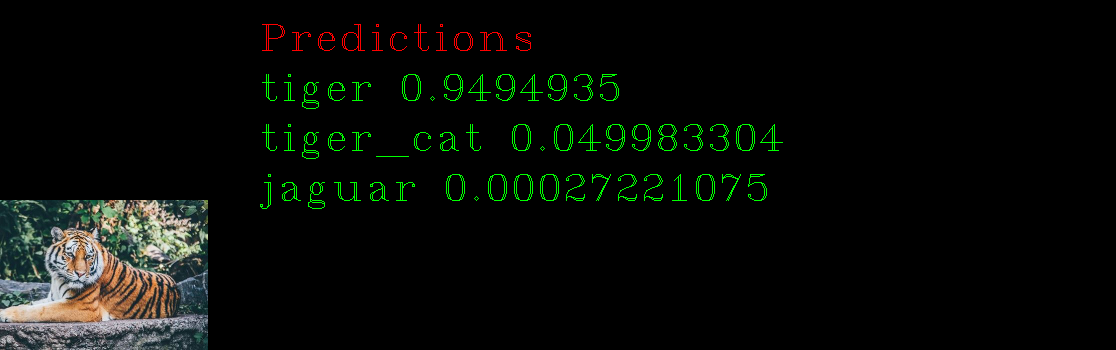

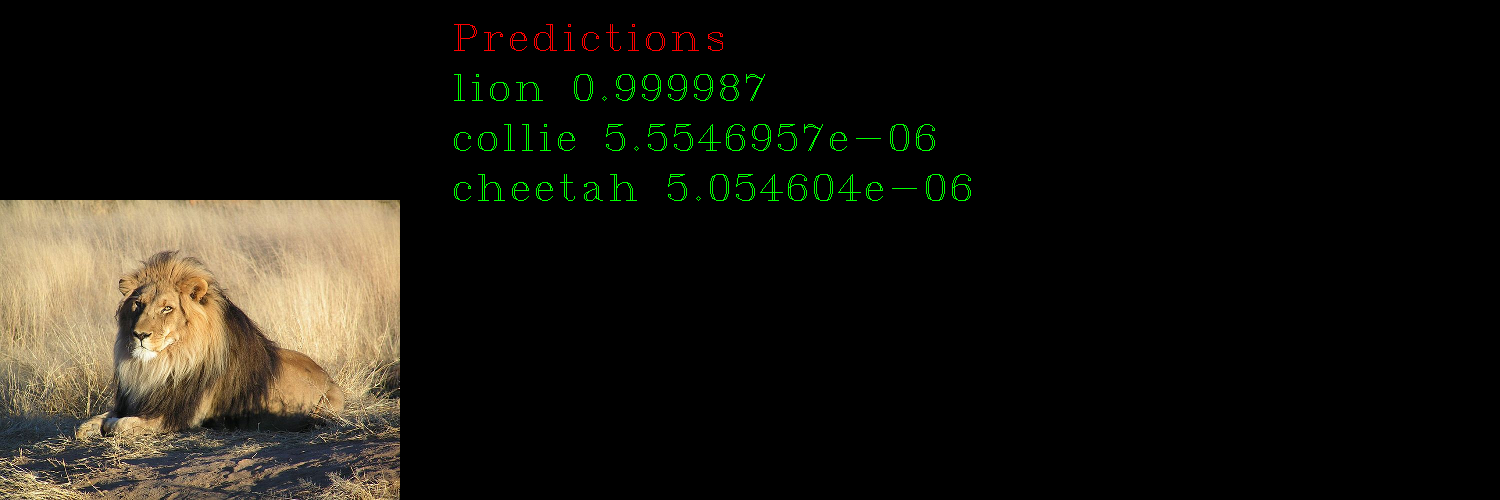

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from os import listdir
from os.path import isfile, join

# Our openCV function that displays the image and it's predicted labels 
def draw_test(name, preditions, input_im):
    """Function displays the output of the prediction alongside the orignal image"""
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 200, 0, 0, imageL.shape[1]+700 ,cv2.BORDER_CONSTANT,value=BLACK)
    img_width = input_im.shape[1]
    for (i,predition) in enumerate(preditions):
        string = str(predition[1]) + " " + str(predition[2])
        cv2.putText(expanded_image,str(name),(img_width + 50,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,2,(0,0,255),1)
        cv2.putText(expanded_image,string,(img_width + 50,50+((i+1)*50)),cv2.FONT_HERSHEY_COMPLEX_SMALL,2,(0,255,0),1)
    cv2_imshow(expanded_image)

# Get images located in ./images folder    
mypath = "/content/drive/MyDrive/Data/6/images/imagenet_images/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Loop through images run them through our classifer
for file in file_names:

    from tensorflow.keras.preprocessing import image # Need to reload as opencv2 seems to have a conflict
    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    imageL = cv2.resize(img2, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = resnet_model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    draw_test("Predictions", preditions, imageL) 
    cv2.waitKey(0)
    cv2.destroyAllWindows()


comparison of  VGG16 and ResNet50



In [ ]:
import numpy as np
from tensorflow.keras.applications import vgg16

#Loads the VGG16 model
vgg_model = vgg16.VGG16(weights='imagenet')

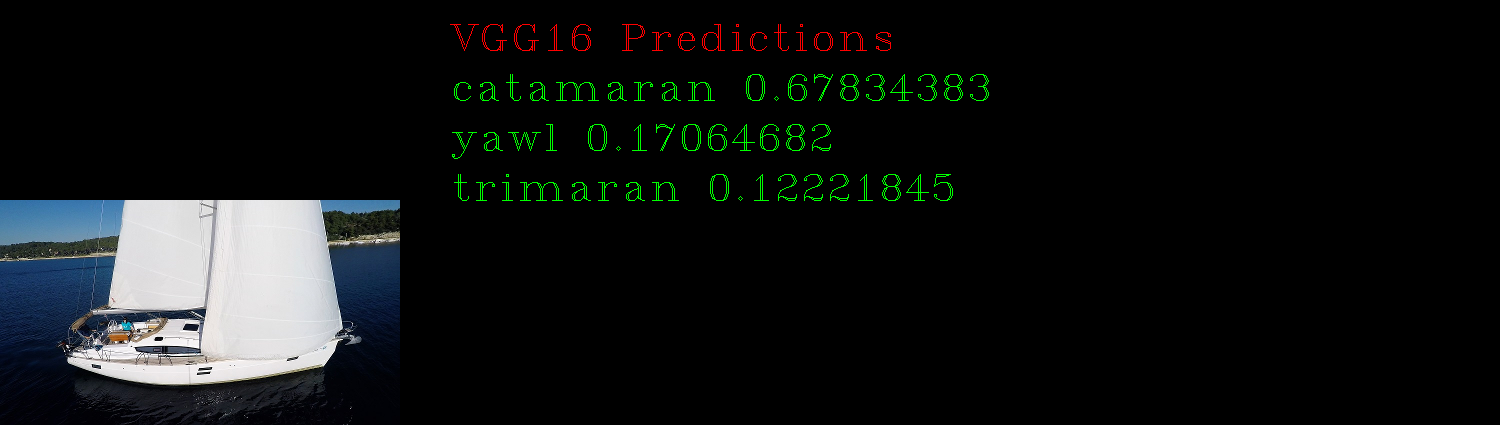

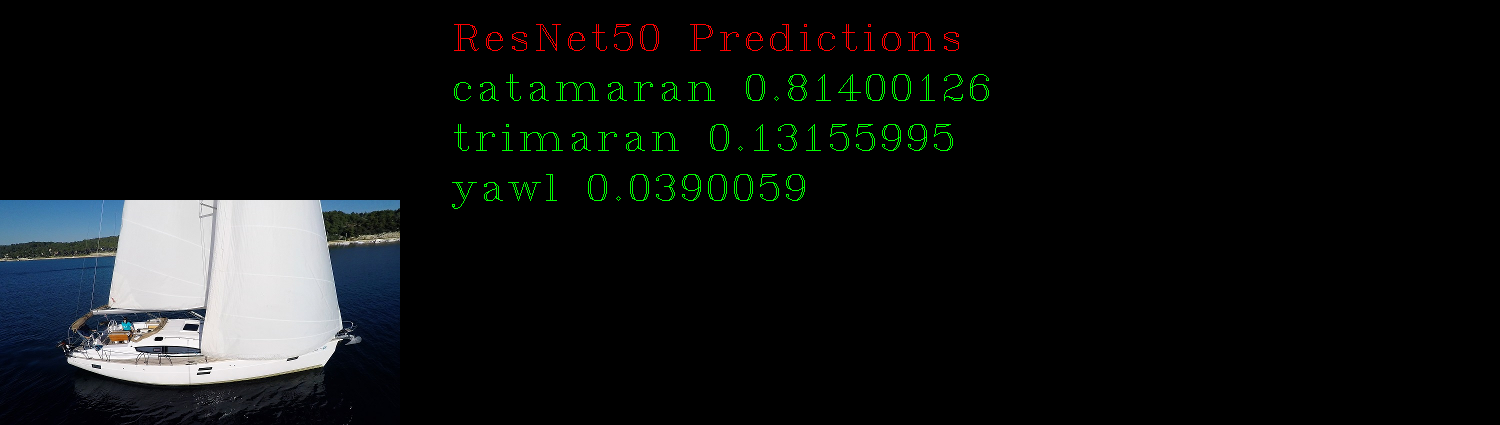

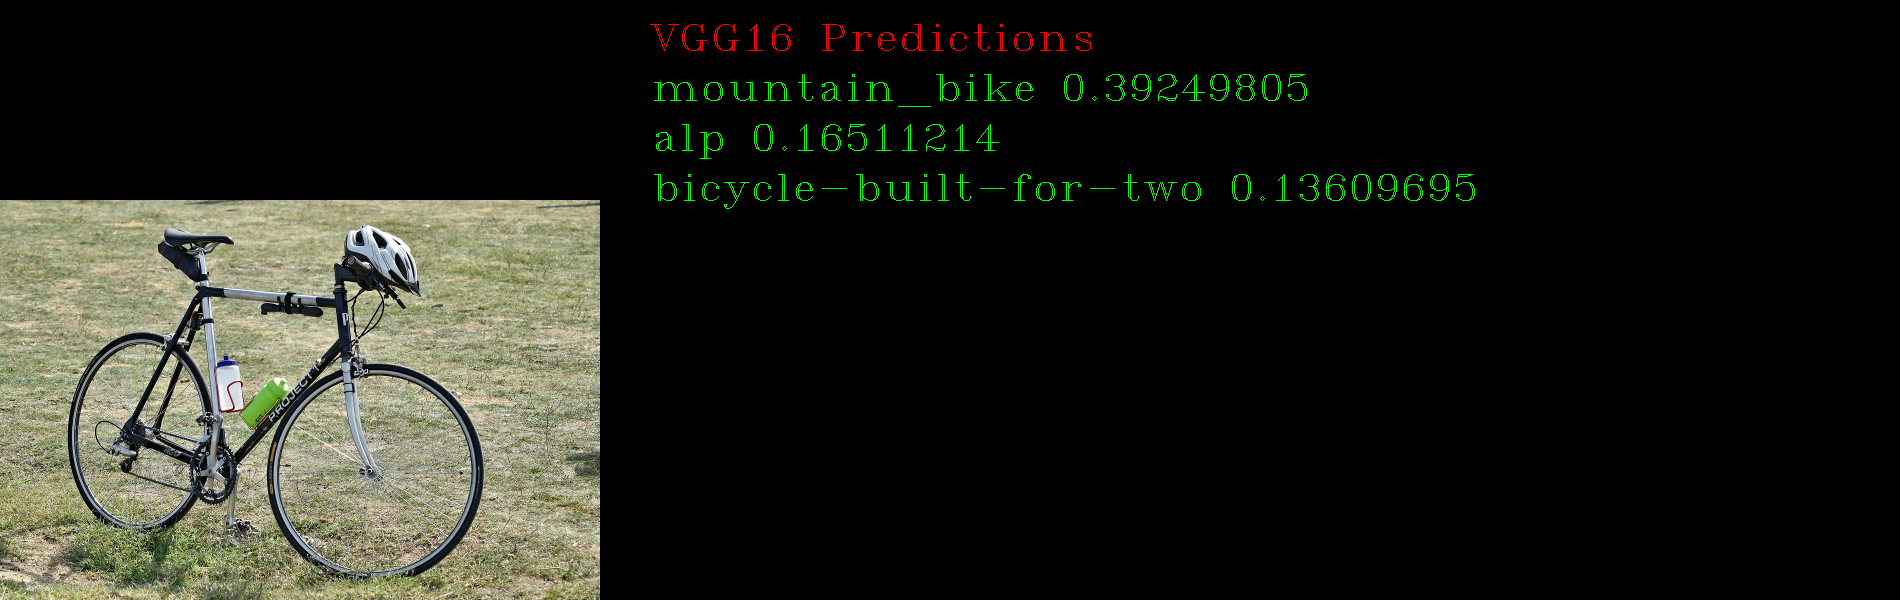

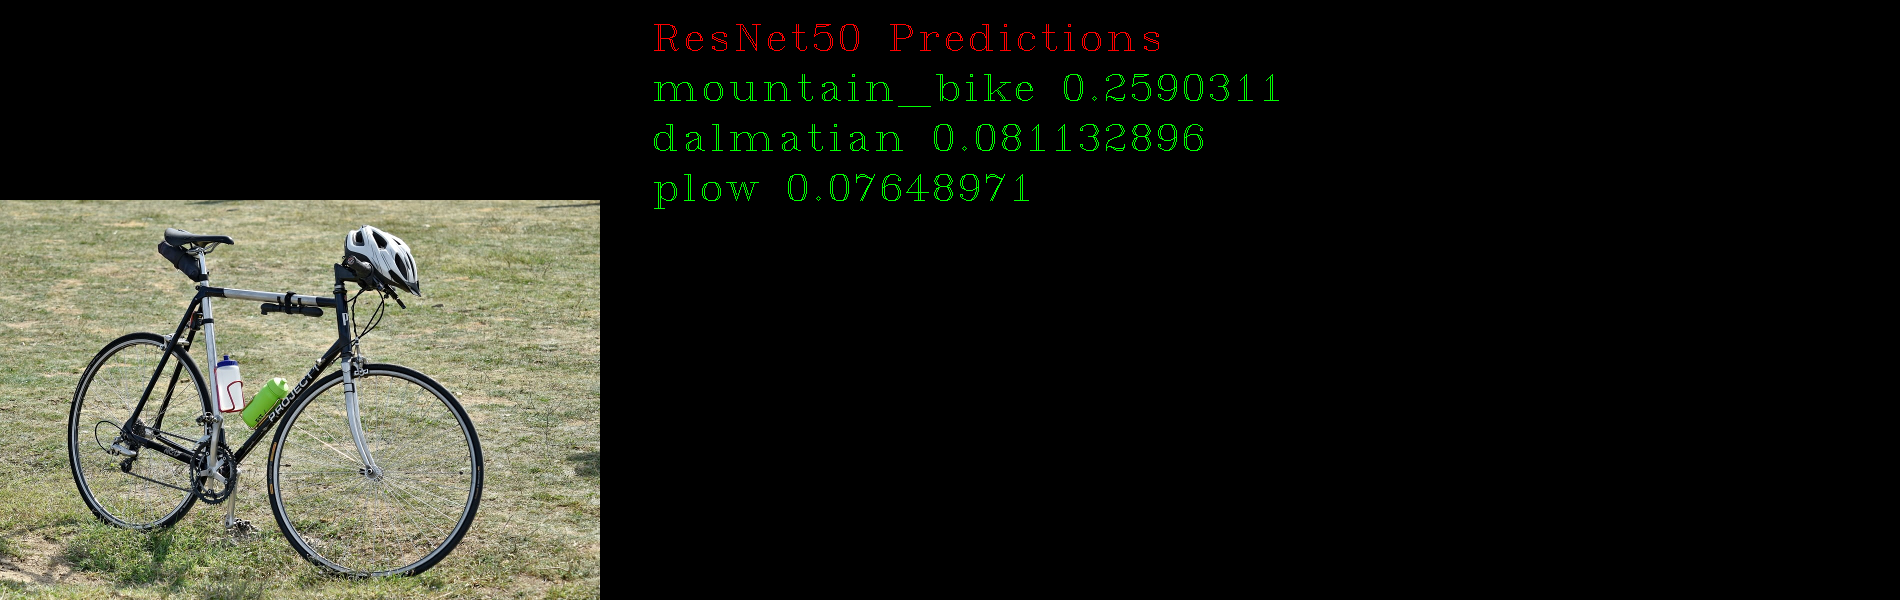

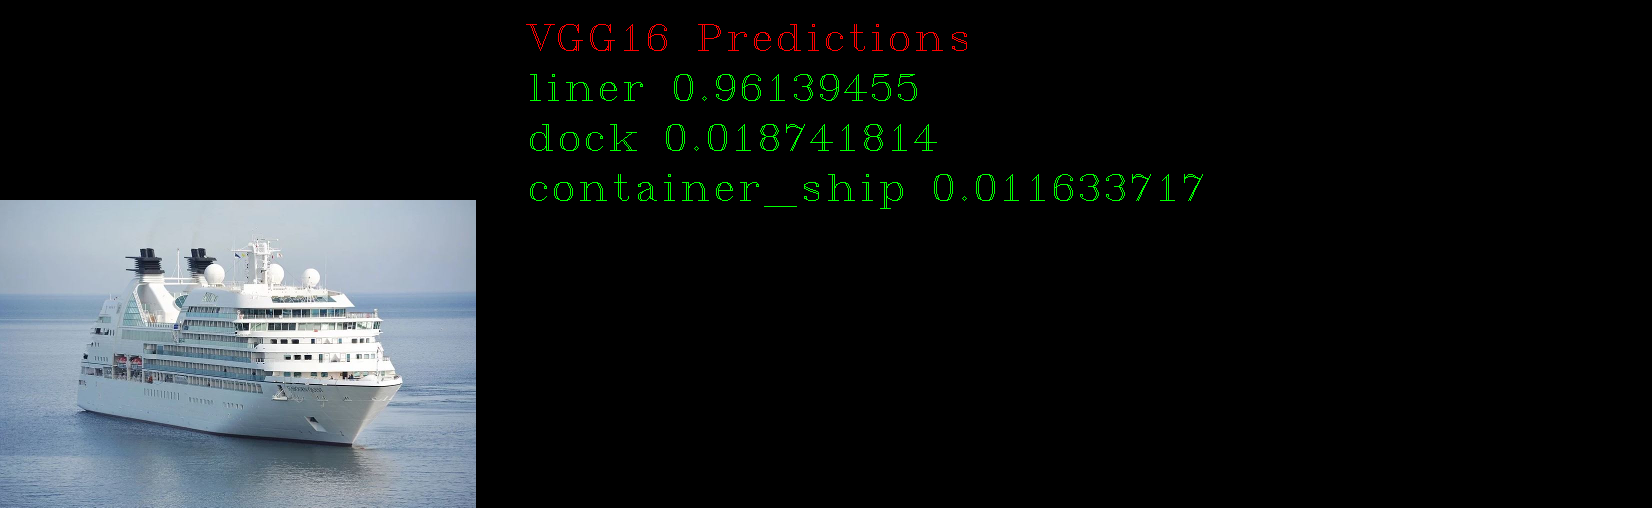

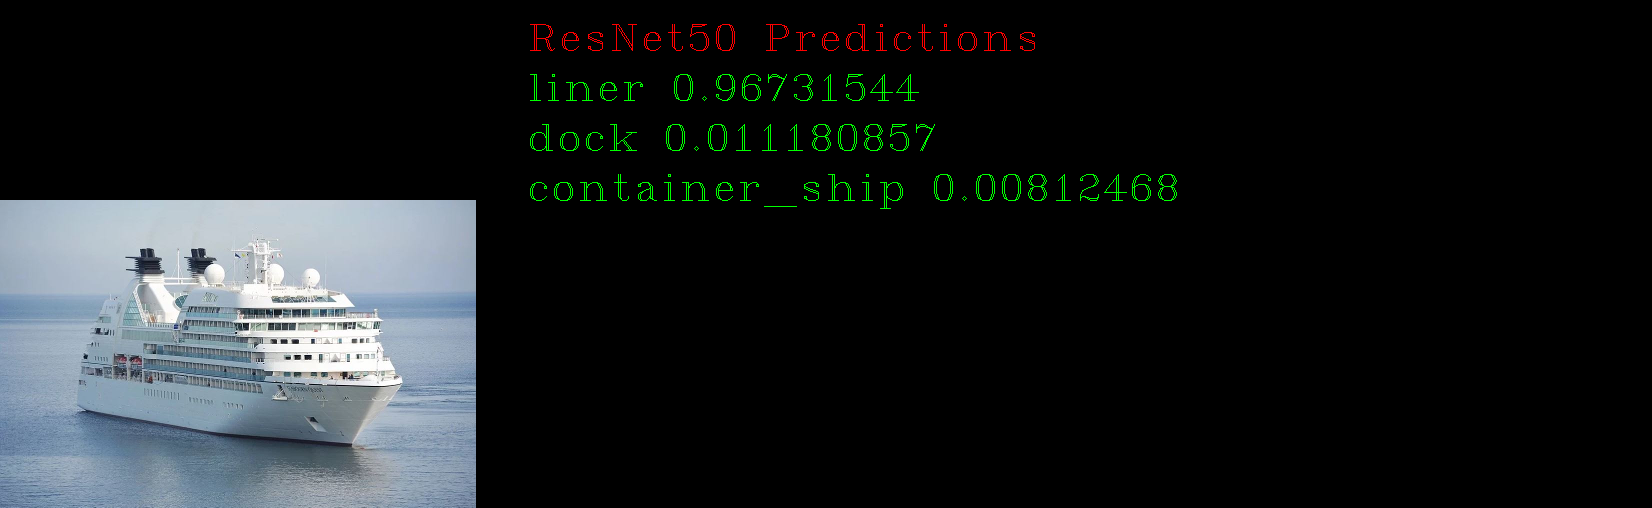

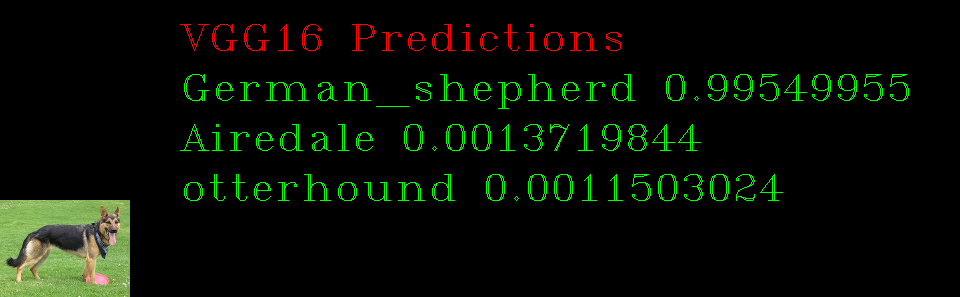

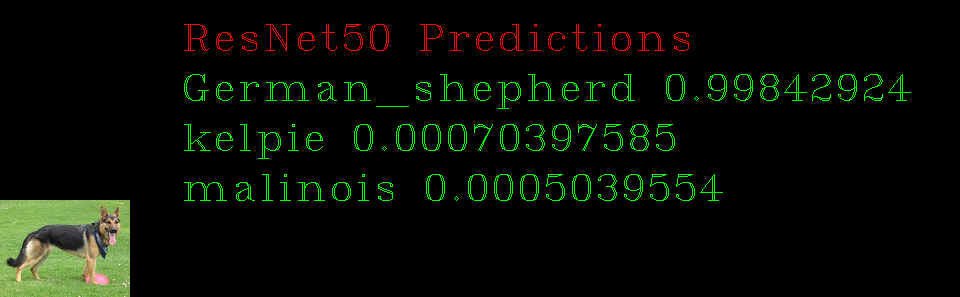

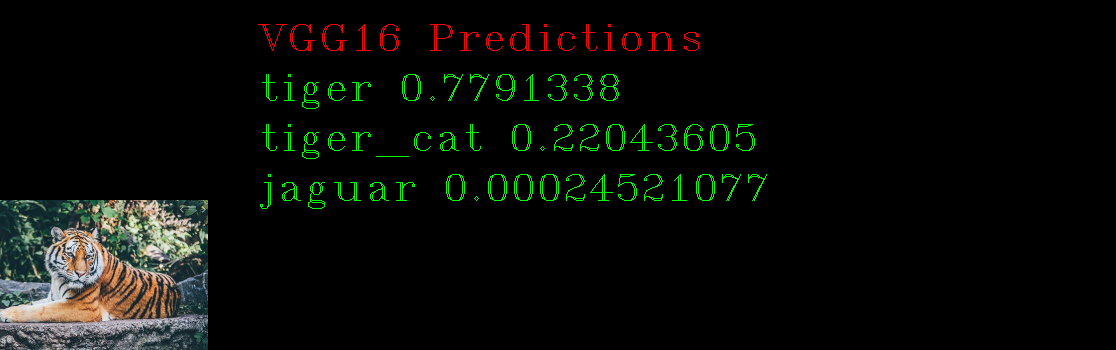

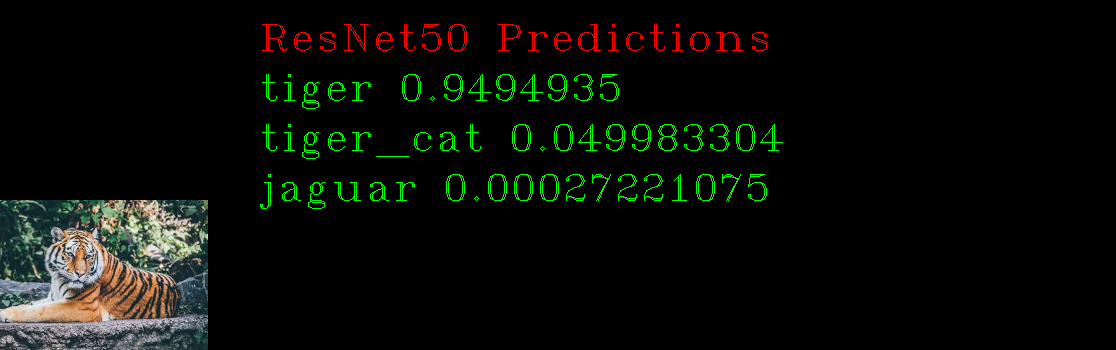

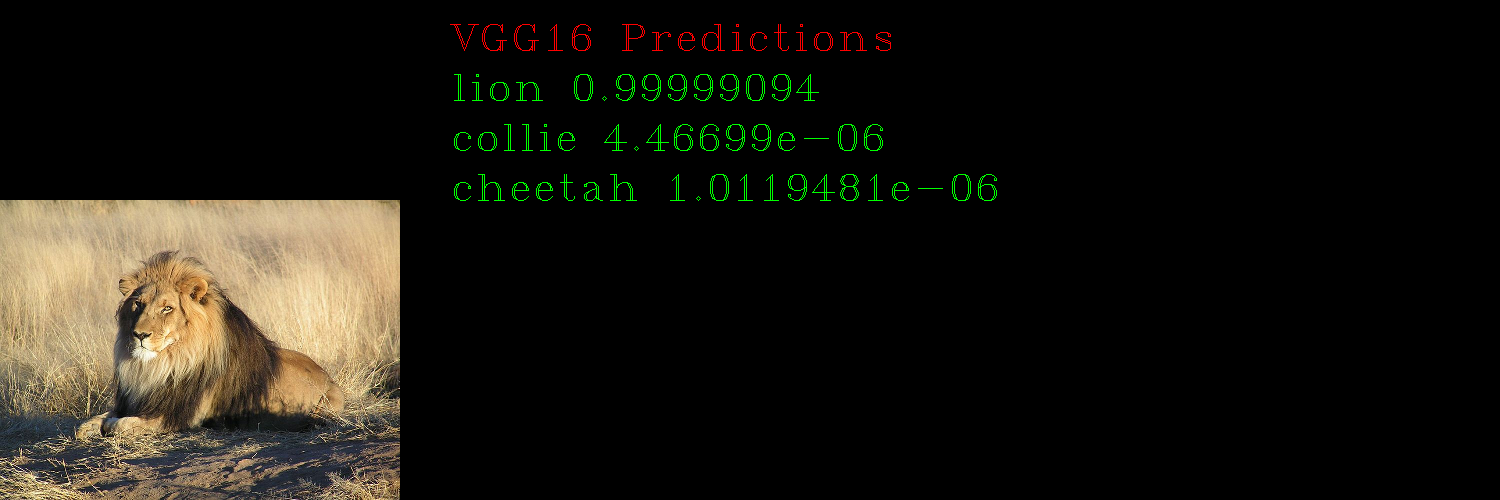

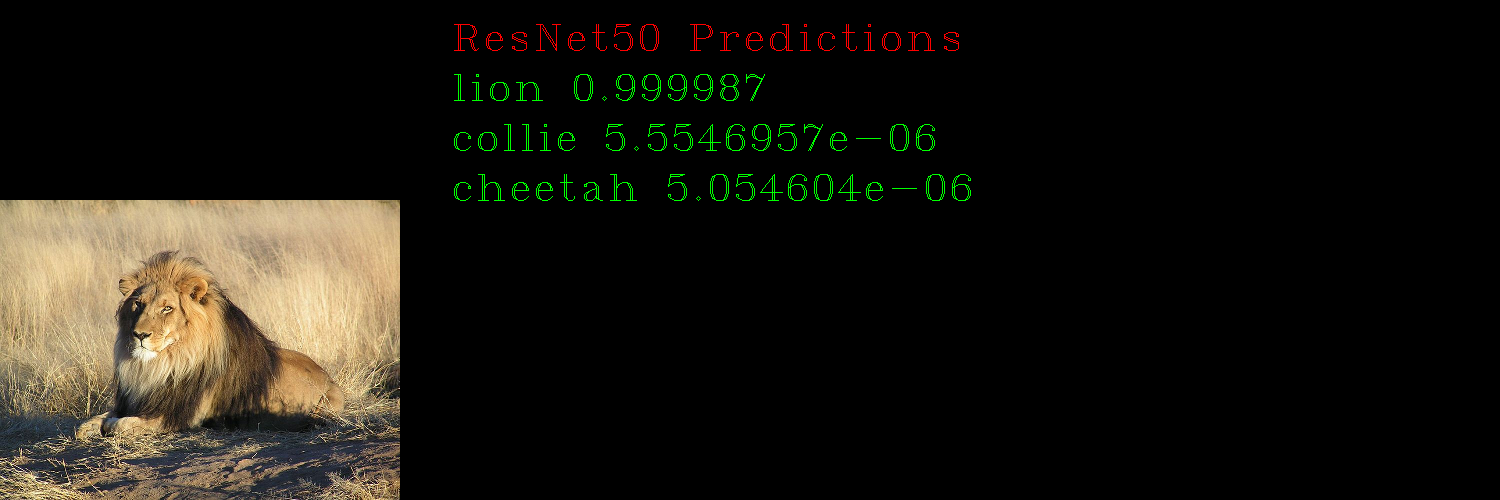

In [ ]:
# Get images located in ./images folder    
mypath = "/content/drive/MyDrive/Data/6/images/imagenet_images/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Loop through images run them through our classifer
for file in file_names:

    from tensorflow.keras.preprocessing import image # Need to reload as opencv2 seems to have a conflict
    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get VGG16 Predictions
    preds_vgg_model = vgg_model.predict(x)
    preditions_vgg = decode_predictions(preds_vgg_model, top=3)[0]
    draw_test("VGG16 Predictions", preditions_vgg, imageL) 
    
    # Get ResNet50 Predictions
    preds_resnet = resnet_model.predict(x)
    preditions_resnet = decode_predictions(preds_resnet, top=3)[0]
    draw_test("ResNet50 Predictions", preditions_resnet, imageL) 
    
    cv2.waitKey(0)

cv2.destroyAllWindows()
